In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset = pd.read_csv('/content/Housing.csv')

In [ ]:
display(dataset.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#check for missing values
missing_values = dataset.isnull().sum()
print('Missing Values')
print(missing_values)

Missing Values
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# handle missing values if necessary
# for example to remove rows with missing values
dataset.dropna(inplace=True)

In [ ]:
#convert a categorical variable to numeric using one_hot encoding
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

define the target and input features

In [ ]:
x = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
                                           'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]

y = dataset['price']

Data splitting

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


linear regression modeling

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

model evalution

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


visualization

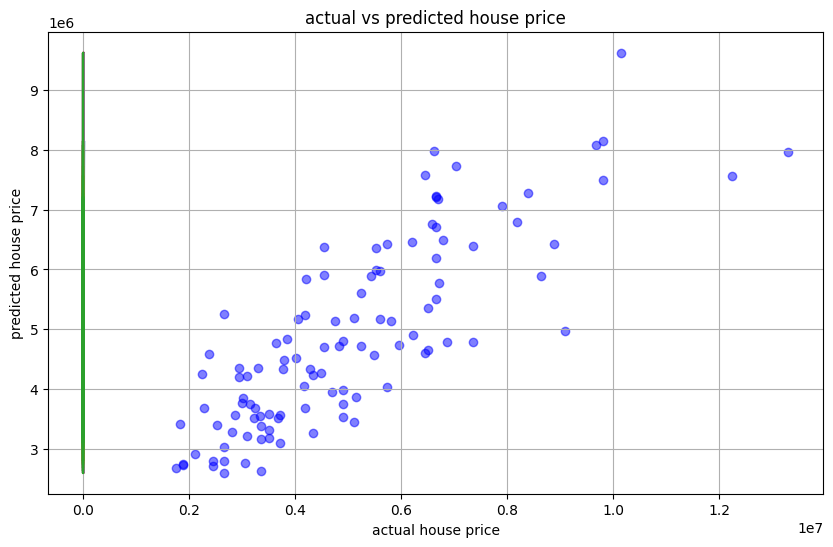

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color ='blue', alpha=0.5)
plt.plot(x_test, y_pred)
plt.xlabel('actual house price')
plt.ylabel('predicted house price')
plt.title('actual vs predicted house price')
plt.grid(True)
plt.show()